### Exercise 6

In this excercise we have implemented three different marcov chain monte carlo sampling methods.

In [660]:
import numpy as np
from math import floor,factorial
from scipy import stats
from matplotlib import pyplot as plt
from scipy.stats import chi2

## Part 1

In this part we have implemented one dimensional metropolis hasting. In that method we move a random step to get a new samplme using a symetrical distribution and the we check if the new sample has greater non normalized probability. Dipending on the result and some random coin flip we accept the new sample or we repeat the previous one. 

In [661]:
m=11
lambd = 1
s=8
A= lambd*s

Our theoretical distribution id partially calculated by the following function.

In [662]:
def g(i):
    if (i > m): return 0
    if (i < 0): return 0
    return (A**i)/factorial(i)

### Question a

In [663]:
def step():
    s = np.random.uniform(0,1,1)[0]
    if (s<=1/3):
        return -1
    if (s<=2/3):
        return 0
    return 1

In [664]:
def sample_MCMC(sample_size):
    Xi=floor(m*np.random.uniform(0,1,1)[0])
    sample = np.empty( 0 , dtype = 'float64' )
    #sample = np.append( sample , Xi )
    for i in range(sample_size):
        
        Dxi= step()
        Yi = Xi + Dxi
        if (Yi > m-1): 
            Yi =0
        if (Yi < 0): 
            Yi =11
        acceptance = 'reject'
        if (g(Yi)>=g(Xi)):
            if (i%10 == 1) :sample = np.append( sample , Yi )
            Xi=Yi
            continue
        if (np.random.uniform(0,1,1)[0]<=(g(Yi)/g(Xi))):
            if (i%10 == 1) :sample = np.append( sample , Yi )
            Xi=Yi
            continue
        if (i%10 == 1) :sample = np.append( sample , Xi )
    return sample

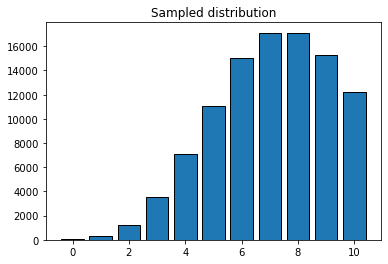

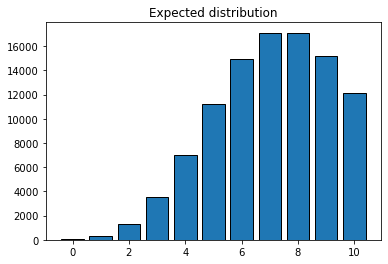

Test score =  8.076677533814195
p_value =  0.6213472689211926


In [665]:
P = [g(i) for i in range(m)]
denominator = sum(P)
P = [100000*i/denominator for i in P ]
X = sample_MCMC(1000001)
X = X
sim_sum = sum(X)

Observ, bins = np.histogram(X, bins= m)

plt.bar(x=range(m),height=Observ, edgecolor='black')
plt.title('Sampled distribution')
plt.show()
plt.bar(x=range(m),height=P , edgecolor='black')
plt.title('Expected distribution')
plt.show()

Observed =  Observ
Expected = P


least_squares = [(Obs-Exp)**2/Exp for Obs, Exp in list(zip(Expected,Observed))]
chi_sqare_calculated_value = sum(least_squares)
print('Test score = ',chi_sqare_calculated_value)
p_value = 1-chi2.cdf(chi_sqare_calculated_value,(np.array(Expected)>0).sum()-1)
print('p_value = ',p_value)

The empirical and the analytical distributions are very close. Also the p-value of the chi2 test is above 0.05 so we have one more reason to believe that we are doing a good sampling.

In [666]:
def p_value_1D(samples_number):
    P = [g(i) for i in range(m)]
    denominator = sum(P)
    P = [10000*i/denominator for i in P ]
    test_scores = np.empty(0,dtype = 'float64')
    p_values = np.empty(0,dtype = 'float64')
    for i in range(samples_number):
        X = sample_MCMC(100501)
        X = X[50:]

        Observ, bins = np.histogram(X, bins= m)
        Observed =  Observ
        Expected = P
        least_squares = [(Obs-Exp)**2/Exp for Obs, Exp in list(zip(Expected,Observed))]
        chi_sqare_calculated_value = sum(least_squares)
        p_value = 1-chi2.cdf(chi_sqare_calculated_value,9)
        
        test_scores = np.append(test_scores,chi_sqare_calculated_value)
        p_values = np.append(p_values,p_value)
    return test_scores,p_values
test_scores,p_values = p_value_1D(100)
Observ, bins = np.histogram(X, bins= 10)

To be mores ure we have tried to check the distribution of the p-value.

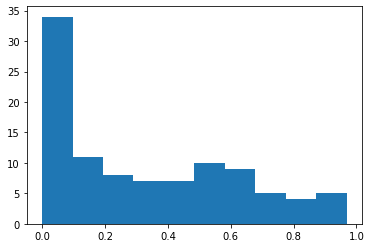

In [667]:
Observ, bins = np.histogram(p_values, bins= 10)
plt.hist(p_values, bins= 10)
plt.show()

It seems that the distribution of the p-value is not uniformly distributed. One possible explanation could be that at 0 we have less than five observations. 

## Part 2

In this part we apply the same method at the two dimentions

In [668]:
A = 4

### a 

In this part we in each step we move at the same time to two directions while doing the 2D MCMC sampling.

In [669]:
def g_2d(x):
    i,j = x
    if (i >= m): return 0
    if (j >= m): return 0
    if (i+j >= m): return 0
    if (i < 0): return 0
    if (j < 0): return 0
    if (i+j < 0): return 0
    return ((A**i)/factorial(i))*((A**j)/factorial(j))


In [670]:
def sample_MCMC_2d(sample_size):
    Xi1=floor(m*np.random.uniform(0,1,1)[0])
    Xi2=floor((m-Xi1)*np.random.uniform(0,1,1)[0])
    Xi=(Xi1,Xi2)
    sample = []
    sample.append( Xi )
    for i in range(sample_size-1):
        #print('sample=',sample)
        Dxi_1= step()
        Dxi_2= step()
        Yi = ((Xi[0] + Dxi_1)%m,(Xi[1]+Dxi_2)%m)
        acceptance = 'reject'
        #print('Xi=',Xi)
        #print('Yi=',Yi)
        #print('g(Xi)=',g(Xi))
        #print('g(Yi)=',g(Yi))
        #input()
        if (g_2d(Yi)>=g_2d(Xi)):
            if (i%10 == 0) :sample.append( Yi )
            Xi=Yi
            continue
        if (np.random.uniform(0,1,1)[0]<=(g_2d(Yi)/g_2d(Xi))):
            if (i%10 == 0) :sample.append(  Yi )
            Xi=Yi
            continue
        if (i%10 == 0) :sample.append(  Xi )
    return sample

In [671]:
probs = np.zeros((m, m), dtype='float64')

for i in range(m):
    for j in range(m):
        probs[i,j] = g_2d((i,j))
P = probs
denominator = sum(sum(P))
P = 10000*P/denominator

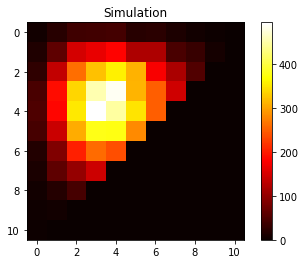

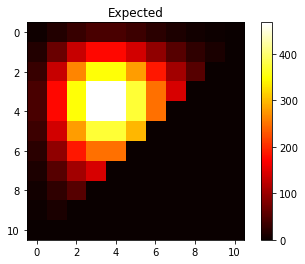

Chi2 score 72.69796519495402
p-value = 0.23942184868356475


In [672]:
counts =  np.zeros((m, m), dtype='float64')
X = sample_MCMC_2d(100000)

for element in X:
    #print(element)
    i,j = element
    counts[i,j] += 1
sim_sum = sum(counts)
Observed = counts
Expected = P

plt.imshow(Observed, cmap='hot')
plt.colorbar()
plt.title("Simulation")
plt.show()

plt.imshow(Expected, cmap='hot')
plt.colorbar()
plt.title("Expected")
plt.show()

least_squares = np.zeros((m, m), dtype='float64')
for i in range(m):
    for j in range(m):
        if (Expected[i,j] == 0.0): 
            least_squares[i,j]=0
            continue
        least_squares[i,j] = (Observed[i,j]-Expected[i,j])**2/Expected[i,j]
chi_sqare_calculated_value = sum(sum(least_squares))
print('Chi2 score',chi_sqare_calculated_value)
p_value = 1-chi2.cdf(chi_sqare_calculated_value,(np.array(Expected)>0).sum()-1)
p_value
print('p-value =',p_value)

The theoretical and the expected distributions are very similar to one another. This is also shown from the p-value at the chi2 test which is above 0.05.

In [673]:
def p_value_2D(samples_number):
    
    probs = np.zeros((m, m), dtype='float64')

    for i in range(m):
        for j in range(m):
            probs[i,j] = g_2d((i,j))
    P = probs
    denominator = sum(sum(P))
    P = 10000*P/denominator
    
    test_scores = np.empty(0,dtype = 'float64')
    p_values = np.empty(0,dtype = 'float64')
    for i in range(samples_number):
        X = sample_MCMC_2d(100501)
        X = X[50:]

        Observ, bins = np.histogram(X, bins= m)
        Observed =  Observ
        Expected = P
        least_squares = [(Obs-Exp)**2/Exp for Obs, Exp in list(zip(Expected,Observed))]
        chi_sqare_calculated_value = sum(least_squares)
        p_value = 1-chi2.cdf(chi_sqare_calculated_value,(np.array(Expected)>0).sum()-1)
        
        test_scores = np.append(test_scores,chi_sqare_calculated_value)
        p_values = np.append(p_values,p_value)
    return test_scores,p_values
test_scores,p_values = p_value_1D(100)
Observ, bins = np.histogram(X, bins= 10)

### Question b

Now we are going to do a MCMC at two dimensions but doing it into  steps in order to make a dimension-wise sampling.

In [674]:
def sample_MCMC_2d_dwise(sample_size):
    Xi1=floor(m*np.random.uniform(0,1,1)[0])
    Xi2=floor((m-Xi1)*np.random.uniform(0,1,1)[0])
    Xi=(Xi1,Xi2)
    sample = []
    sample.append( Xi )
    for i in range(sample_size-1):
        #print('sample=',sample)
        Dxi_1= step()
        Dxi_2= step()
        Yi_1d = ((Xi[0] + Dxi_1)%m,Xi[1])
        #print('Xi=',Xi)
        #print('Yi=',Yi)
        #print('g(Xi)=',g(Xi))
        #print('g(Yi)=',g(Yi))
        #input()
        if (g_2d(Yi_1d)>=g_2d(Xi)):
            Xi=Yi_1d
         
        elif (np.random.uniform(0,1,1)[0]<=(g_2d(Yi_1d)/g_2d(Xi))):
            Xi=Yi_1d
        Yi_2d = (Xi[0],(Xi[1] + Dxi_2)%m)
        
        
        if (g_2d(Yi_2d)>=g_2d(Xi)):
            if (i%10 == 0) :sample.append(Yi_2d )
            Xi=Yi_2d
            continue
        if (np.random.uniform(0,1,1)[0]<=(g_2d(Yi_2d)/g_2d(Xi))):
            if (i%10 == 0) :sample.append(  Yi_2d )
            Xi=Yi_2d
            continue
        
        if (i%10 == 0) :sample.append(  Xi )
    return sample

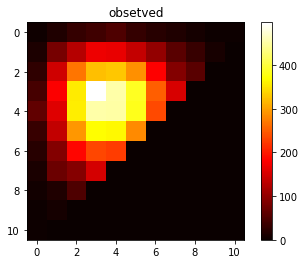

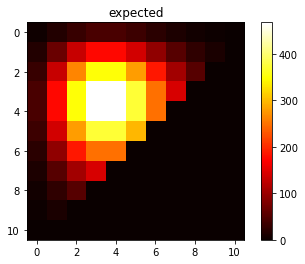

Chi2 score 58.325568035034195
p-value = 0.7080467932183352


In [675]:
probs = np.zeros((m, m), dtype='float64')

for i in range(m):
    for j in range(m):
        probs[i,j] = g_2d((i,j))
P = probs
denominator = sum(sum(P))
P = 10000*P/denominator

counts =  np.zeros((m, m), dtype='float64')
X = sample_MCMC_2d_dwise(100050)
X = X[50:]

for element in X:
    #print(element)
    i,j = element
    counts[i,j] += 1
sim_sum = sum(counts)
Observed = counts
Expected = P



plt.imshow(Observed, cmap='hot')
plt.colorbar()
plt.title("obsetved")
plt.show()

plt.imshow(Expected, cmap='hot')
plt.colorbar()
plt.title("expected")
plt.show()

least_squares = np.zeros((m, m), dtype='float64')
for i in range(m):
    for j in range(m):
        if (Expected[i,j] == 0.0): 
            least_squares[i,j]=0
            continue
        least_squares[i,j] = (Observed[i,j]-Expected[i,j])**2/Expected[i,j]
chi_sqare_calculated_value = sum(sum(least_squares))
print('Chi2 score',chi_sqare_calculated_value)
p_value = 1-chi2.cdf(chi_sqare_calculated_value,(np.array(Expected)>0).sum()-1)
p_value
print('p-value =',p_value)

The theoretical and the expected distributions are very similar to one another. This is also shown from the p-value at the chi2 test which is above 0.05.